In [ ]:
import os
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.nn.functional import softmax
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig
from netrep.metrics import LinearMetric, EnergyStochasticMetric

# My code. 
import generators

# The parameters I ran the experiment with. 
PROMPT = "Once upon a time"
PROMPT_LENGTH = len(PROMPT.split(" "))
SEEDS = [1, 2, 3]
TEMPERATURES = [0, 0.5, 1.0, 2.0]
NUM_EXPERIMENTS = 800
NUM_TOKENS = 20



# Of shape (Temperature, Seed, Num_Experiments, 64)
per_trial_data = np.load('ranging_temperature_across_k_seeds/experiment0_per_trial_tensor.npy')

per_trial_data.shape

(4, 3, 800, 64)

In [ ]:
# Take the average over the number of experiments. 
np_average_trajectories = np.mean(per_trial_data, 2)
np_average_trajectories.shape



(4, 3, 64)

In [ ]:
linear_distances = []
stochastic_distances = [] # single-dim

# (Time points, # Neurons )

alphas = [0, 0.5, 1]

reshaped = np_average_trajectories.reshape(4, 3, PROMPT_LENGTH + NUM_TOKENS - 1, 64)

Xs = [] # [ (X, 64), (X,64), ..... ]
for t in range(len(TEMPERATURES)):
    for s in range(len(SEEDS)):
        Xs.append(reshaped[t, s].T)


for alpha in alphas:
    metric = LinearMetric(alpha=alpha, score_method="euclidean")
    dist, _ = metric.pairwise_distances(Xs)
    linear_distances.append(dist)


Parallelizing 66 distance calculations with 8 processes.


Computing distances: 100%|██████████| 66/66 [00:02<00:00, 23.13it/s]

Parallelizing 66 distance calculations with 8 processes.



Computing distances: 100%|██████████| 66/66 [00:02<00:00, 23.64it/s]

Parallelizing 66 distance calculations with 8 processes.



Computing distances: 100%|██████████| 66/66 [00:02<00:00, 24.30it/s]


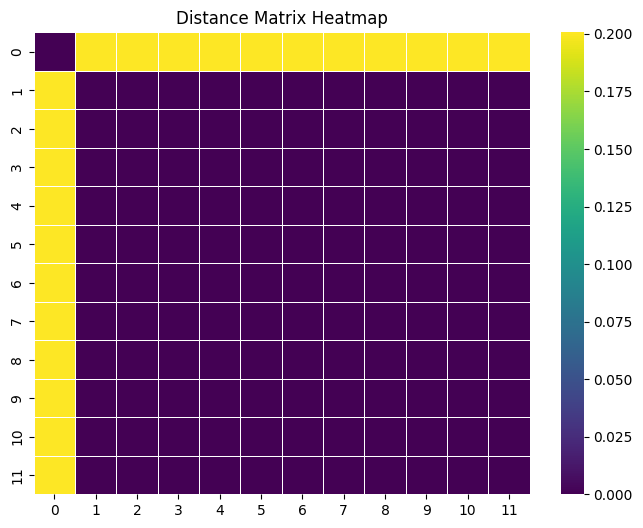

In [93]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(linear_distances[2], cmap='viridis', annot=False, fmt=".2f", linewidths=.5)

plt.title('Distance Matrix Heatmap')
plt.show()